In [24]:
import numpy as np
import deepxde as dde
import matplotlib.pyplot as plt
import pandas as pd
from deepxde.backend import tf
from scipy import interpolate
print(tf.__version__)

2.7.0


In [25]:
del_stress = 650.0-100.0 #1600
stress_min = 100.0 
del_time = 9.858-0.1
time_min = 0.1
del_shear_rate = 10.0-1.9
shear_min = 1.9 


def gen_training_data():
    
    time_data = []
    gammadot_data = []
    shear_stress_data = []
    
    for itr in range(1,10): 
        if itr==6:
            continue
        t_expt = []
        t_expt_first = []
        t_expt_last = []
        gammadot = []
        gammadot_first = []
        gammadot_last = []
        shear_stress = []
        shear_stress_first = []
        shear_stress_last = []
        t_fitted = []
        gammadot_fitted = []
        shear_stress_fitted = []
       
        startUpFlow = pd.read_excel('DOWTC5622-09-02-22.xlsx',header = None, names=['shear rate','t','shear stress'], sheet_name=itr, skiprows=range(148,296)) #148
        # Reading data from sheet number - itr
        t_expt = np.array(startUpFlow["t"])
        t_expt_first = t_expt[0:48]
        t_expt_last = t_expt[48:]
        print(t_expt_first)
        print(t_expt_last)
        
        #print(t_expt)
        gammadot = np.array(startUpFlow["shear rate"])
        gammadot_first = gammadot[0:48]
        gammadot_last = gammadot[48:]
        #gammadot = gammadot[:,np.newaxis]
        
        shear_stress = np.array(startUpFlow["shear stress"])
        shear_stress_first = shear_stress[0:48]
        shear_stress_last = shear_stress[48:]
        #shear_stress = shear_stress[:,np.newaxis]
        
        # interpolating shear stress and shear rate separately with time (increasing data points)
        f_shear_stress = interpolate.interp1d(t_expt_first, shear_stress_first) 
        f_gammadot = interpolate.interp1d(t_expt_first, gammadot_first)
        t_fitted = np.linspace(t_expt_first[0],t_expt_first[t_expt_first.size-1],250)  
        gammadot_fitted = f_gammadot(t_fitted)
        shear_stress_fitted = f_shear_stress(t_fitted) 
        
        f_shear_stress_1 = interpolate.interp1d(t_expt_last, shear_stress_last) 
        f_gammadot_1 = interpolate.interp1d(t_expt_last, gammadot_last)
        t_fitted_1 = np.linspace(t_expt_last[0],t_expt_last[t_expt_last.size-1],300)  
        gammadot_fitted_1 = f_gammadot_1(t_fitted_1)
        shear_stress_fitted_1 = f_shear_stress_1(t_fitted_1)
        
        time_itr = []
        gammadot_itr = []
        shear_stress_itr = []
        
        time_itr = np.append(t_fitted,t_fitted_1)
        time_itr = time_itr[:,np.newaxis]
        
        gammadot_itr = np.append(gammadot_fitted,gammadot_fitted_1)
        gammadot_itr = gammadot_itr[:,np.newaxis] 
        
        shear_stress_itr = np.append(shear_stress_fitted,shear_stress_fitted_1)
        shear_stress_itr = shear_stress_itr[:,np.newaxis]
        
        # Converting to a column vector
        #t_fitted = t_fitted[:,np.newaxis]
        #gammadot_fitted = gammadot_fitted[:,np.newaxis] 
        #shear_stress_fitted = shear_stress_fitted[:,np.newaxis]
        
        plt.plot(time_itr,shear_stress_itr, '-r', label='Fit')
        plt.plot(t_expt,shear_stress,'*b', label='Experiment')
        plt.legend()
        plt.xscale('log')

        plt.xlabel('time (s)')
        plt.ylabel('Shear stress (Pa)')
        plt.show()
        
        # Non-Dimensionalizing - O(0-1)
        time_itr =  (time_itr-time_min)/(del_time)  
        gammadot_itr =  (gammadot_itr-shear_min)/(del_shear_rate)          
        shear_stress_itr = (shear_stress_itr-stress_min)/(del_stress) 
        
        # Appending data from each sheet to a global array and converting to a column
        
        time_data = np.append(time_data,time_itr)
        time_data = time_data[:,np.newaxis]
        
        gammadot_data = np.append(gammadot_data,gammadot_itr)
        gammadot_data = gammadot_data[:,np.newaxis] 
        
        shear_stress_data = np.append(shear_stress_data,shear_stress_itr)
        shear_stress_data = shear_stress_data[:,np.newaxis]
    
        print(np.size(gammadot_data))
        print(np.size(time_data))   
        print(np.size(shear_stress_data))
        #print(gammadot_data)
        #print(time_data)
    
    
    return np.hstack((gammadot_data, time_data)) , shear_stress_data # check
    

#observe_x, shear_stress_training = gen_training_data()
#print(observe_x)

[0.11  0.122 0.134 0.147 0.159 0.173 0.186 0.199 0.213 0.227 0.242 0.256
 0.271 0.286 0.302 0.318 0.334 0.35  0.367 0.384 0.402 0.419 0.437 0.456
 0.474 0.494 0.513 0.533 0.553 0.574 0.595 0.616 0.638 0.661 0.683 0.706
 0.73  0.754 0.779 0.804 0.829 0.855 0.881 0.908 0.936 0.964 0.992 1.022]
[1.051 1.081 1.112 1.144 1.176 1.208 1.242 1.275 1.31  1.345 1.381 1.418
 1.455 1.493 1.532 1.571 1.611 1.653 1.694 1.737 1.78  1.825 1.87  1.916
 1.963 2.011 2.059 2.109 2.159 2.211 2.264 2.317 2.372 2.427 2.484 2.542
 2.601 2.661 2.722 2.785 2.848 2.913 2.979 3.047 3.115 3.185 3.257 3.329
 3.404 3.479 3.556 3.635 3.715 3.796 3.879 3.964 4.05  4.138 4.228 4.319
 4.412 4.507 4.604 4.703 4.803 4.906 5.01  5.117 5.225 5.336 5.449 5.564
 5.681 5.8   5.922 6.046 6.173 6.301 6.433 6.567 6.703 6.842 6.984 7.128
 7.276 7.426 7.579 7.735 7.894 8.056 8.221 8.389 8.561 8.736 8.914 9.096
 9.281 9.469 9.662 9.858]


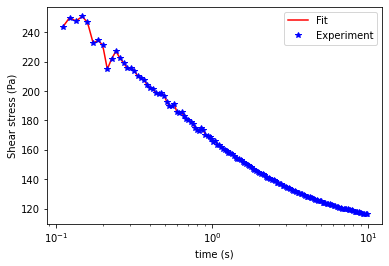

550
550
550
[0.11  0.122 0.134 0.147 0.159 0.173 0.186 0.199 0.213 0.227 0.242 0.256
 0.271 0.286 0.302 0.318 0.334 0.35  0.367 0.384 0.402 0.419 0.437 0.456
 0.474 0.494 0.513 0.533 0.553 0.574 0.595 0.616 0.638 0.661 0.683 0.706
 0.73  0.754 0.779 0.804 0.829 0.855 0.881 0.908 0.936 0.964 0.992 1.022]
[1.051 1.081 1.112 1.144 1.176 1.208 1.242 1.275 1.31  1.345 1.381 1.418
 1.455 1.493 1.532 1.571 1.611 1.653 1.694 1.737 1.78  1.825 1.87  1.916
 1.963 2.011 2.059 2.109 2.159 2.211 2.264 2.317 2.372 2.427 2.484 2.542
 2.601 2.661 2.722 2.785 2.848 2.913 2.979 3.047 3.115 3.185 3.257 3.329
 3.404 3.479 3.556 3.635 3.715 3.796 3.879 3.964 4.05  4.138 4.228 4.319
 4.412 4.507 4.604 4.703 4.803 4.906 5.01  5.117 5.225 5.336 5.449 5.564
 5.681 5.8   5.922 6.046 6.173 6.301 6.433 6.567 6.703 6.842 6.984 7.128
 7.276 7.426 7.579 7.735 7.894 8.056 8.221 8.389 8.561 8.736 8.914 9.096
 9.281 9.469 9.662 9.858]


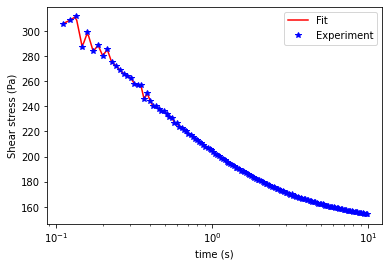

1100
1100
1100
[0.11  0.122 0.134 0.147 0.159 0.173 0.186 0.199 0.213 0.227 0.242 0.256
 0.271 0.286 0.302 0.318 0.334 0.35  0.367 0.384 0.402 0.419 0.437 0.456
 0.474 0.494 0.513 0.533 0.553 0.574 0.595 0.616 0.638 0.661 0.683 0.706
 0.73  0.754 0.779 0.804 0.829 0.855 0.881 0.908 0.936 0.964 0.992 1.022]
[1.051 1.081 1.112 1.144 1.176 1.208 1.242 1.275 1.31  1.345 1.381 1.418
 1.455 1.493 1.532 1.571 1.611 1.653 1.694 1.737 1.78  1.825 1.87  1.916
 1.963 2.011 2.059 2.109 2.159 2.211 2.264 2.317 2.372 2.427 2.484 2.542
 2.601 2.661 2.722 2.785 2.848 2.913 2.979 3.047 3.115 3.185 3.257 3.329
 3.404 3.479 3.556 3.635 3.715 3.796 3.879 3.964 4.05  4.138 4.228 4.319
 4.412 4.507 4.604 4.703 4.803 4.906 5.01  5.117 5.225 5.336 5.449 5.564
 5.681 5.8   5.922 6.046 6.173 6.301 6.433 6.567 6.703 6.842 6.984 7.128
 7.276 7.426 7.579 7.735 7.894 8.056 8.221 8.389 8.561 8.736 8.914 9.096
 9.281 9.469 9.662 9.858]


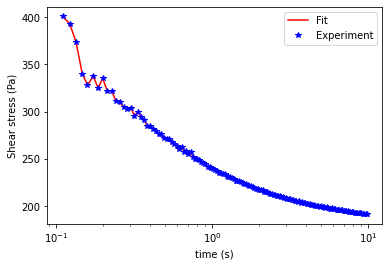

1650
1650
1650
[0.11  0.122 0.134 0.147 0.159 0.173 0.186 0.199 0.213 0.227 0.242 0.256
 0.271 0.286 0.302 0.318 0.334 0.35  0.367 0.384 0.402 0.419 0.437 0.456
 0.474 0.494 0.513 0.533 0.553 0.574 0.595 0.616 0.638 0.661 0.683 0.706
 0.73  0.754 0.779 0.804 0.829 0.855 0.881 0.908 0.936 0.964 0.992 1.022]
[1.051 1.081 1.112 1.144 1.176 1.208 1.242 1.275 1.31  1.345 1.381 1.418
 1.455 1.493 1.532 1.571 1.611 1.653 1.694 1.737 1.78  1.825 1.87  1.916
 1.963 2.011 2.059 2.109 2.159 2.211 2.264 2.317 2.372 2.427 2.484 2.542
 2.601 2.661 2.722 2.785 2.848 2.913 2.979 3.047 3.115 3.185 3.257 3.329
 3.404 3.479 3.556 3.635 3.715 3.796 3.879 3.964 4.05  4.138 4.228 4.319
 4.412 4.507 4.604 4.703 4.803 4.906 5.01  5.117 5.225 5.336 5.449 5.564
 5.681 5.8   5.922 6.046 6.173 6.301 6.433 6.567 6.703 6.842 6.984 7.128
 7.276 7.426 7.579 7.735 7.894 8.056 8.221 8.389 8.561 8.736 8.914 9.096
 9.281 9.469 9.662 9.858]


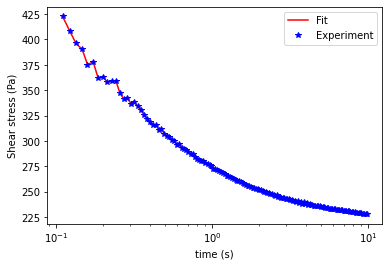

2200
2200
2200
[0.11  0.122 0.134 0.147 0.159 0.173 0.186 0.199 0.213 0.227 0.242 0.256
 0.271 0.286 0.302 0.318 0.334 0.35  0.367 0.384 0.402 0.419 0.437 0.456
 0.474 0.494 0.513 0.533 0.553 0.574 0.595 0.616 0.638 0.661 0.683 0.706
 0.73  0.754 0.779 0.804 0.829 0.855 0.881 0.908 0.936 0.964 0.992 1.022]
[1.051 1.081 1.112 1.144 1.176 1.208 1.242 1.275 1.31  1.345 1.381 1.418
 1.455 1.493 1.532 1.571 1.611 1.653 1.694 1.737 1.78  1.825 1.87  1.916
 1.963 2.011 2.059 2.109 2.159 2.211 2.264 2.317 2.372 2.427 2.484 2.542
 2.601 2.661 2.722 2.785 2.848 2.913 2.979 3.047 3.115 3.185 3.257 3.329
 3.404 3.479 3.556 3.635 3.715 3.796 3.879 3.964 4.05  4.138 4.228 4.319
 4.412 4.507 4.604 4.703 4.803 4.906 5.01  5.117 5.225 5.336 5.449 5.564
 5.681 5.8   5.922 6.046 6.173 6.301 6.433 6.567 6.703 6.842 6.984 7.128
 7.276 7.426 7.579 7.735 7.894 8.056 8.221 8.389 8.561 8.736 8.914 9.096
 9.281 9.469 9.662 9.858]


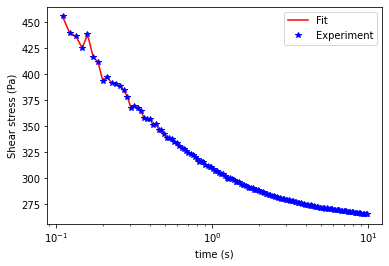

2750
2750
2750
[0.11  0.122 0.134 0.147 0.159 0.173 0.186 0.199 0.213 0.227 0.242 0.256
 0.271 0.286 0.302 0.318 0.334 0.35  0.367 0.384 0.402 0.419 0.437 0.456
 0.474 0.494 0.513 0.533 0.553 0.574 0.595 0.616 0.638 0.661 0.683 0.706
 0.73  0.754 0.779 0.804 0.829 0.855 0.881 0.908 0.936 0.964 0.992 1.022]
[1.051 1.081 1.112 1.144 1.176 1.208 1.242 1.275 1.31  1.345 1.381 1.418
 1.455 1.493 1.532 1.571 1.611 1.653 1.694 1.737 1.78  1.825 1.87  1.916
 1.963 2.011 2.059 2.109 2.159 2.211 2.264 2.317 2.372 2.427 2.484 2.542
 2.601 2.661 2.722 2.785 2.848 2.913 2.979 3.047 3.115 3.185 3.257 3.329
 3.404 3.479 3.556 3.635 3.715 3.796 3.879 3.964 4.05  4.138 4.228 4.319
 4.412 4.507 4.604 4.703 4.803 4.906 5.01  5.117 5.225 5.336 5.449 5.564
 5.681 5.8   5.922 6.046 6.173 6.301 6.433 6.567 6.703 6.842 6.984 7.128
 7.276 7.426 7.579 7.735 7.894 8.056 8.221 8.389 8.561 8.736 8.914 9.096
 9.281 9.469 9.662 9.858]


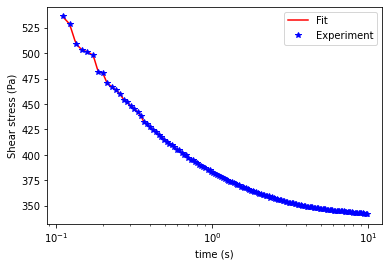

3300
3300
3300
[0.11  0.122 0.134 0.147 0.159 0.173 0.186 0.199 0.213 0.227 0.242 0.256
 0.271 0.286 0.302 0.318 0.334 0.35  0.367 0.384 0.402 0.419 0.437 0.456
 0.474 0.494 0.513 0.533 0.553 0.574 0.595 0.616 0.638 0.661 0.683 0.706
 0.73  0.754 0.779 0.804 0.829 0.855 0.881 0.908 0.936 0.964 0.992 1.022]
[1.051 1.081 1.112 1.144 1.176 1.208 1.242 1.275 1.31  1.345 1.381 1.418
 1.455 1.493 1.532 1.571 1.611 1.653 1.694 1.737 1.78  1.825 1.87  1.916
 1.963 2.011 2.059 2.109 2.159 2.211 2.264 2.317 2.372 2.427 2.484 2.542
 2.601 2.661 2.722 2.785 2.848 2.913 2.979 3.047 3.115 3.185 3.257 3.329
 3.404 3.479 3.556 3.635 3.715 3.796 3.879 3.964 4.05  4.138 4.228 4.319
 4.412 4.507 4.604 4.703 4.803 4.906 5.01  5.117 5.225 5.336 5.449 5.564
 5.681 5.8   5.922 6.046 6.173 6.301 6.433 6.567 6.703 6.842 6.984 7.128
 7.276 7.426 7.579 7.735 7.894 8.056 8.221 8.389 8.561 8.736 8.914 9.096
 9.281 9.469 9.662 9.858]


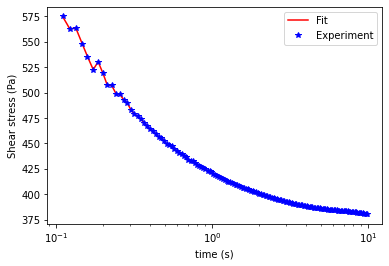

3850
3850
3850
[0.11  0.122 0.134 0.147 0.159 0.173 0.186 0.199 0.213 0.227 0.242 0.256
 0.271 0.286 0.302 0.318 0.334 0.35  0.367 0.384 0.402 0.419 0.437 0.456
 0.474 0.494 0.513 0.533 0.553 0.574 0.595 0.616 0.638 0.661 0.683 0.706
 0.73  0.754 0.779 0.804 0.829 0.855 0.881 0.908 0.936 0.964 0.992 1.022]
[1.051 1.081 1.112 1.144 1.176 1.208 1.242 1.275 1.31  1.345 1.381 1.418
 1.455 1.493 1.532 1.571 1.611 1.653 1.694 1.737 1.78  1.825 1.87  1.916
 1.963 2.011 2.059 2.109 2.159 2.211 2.264 2.317 2.372 2.427 2.484 2.542
 2.601 2.661 2.722 2.785 2.848 2.913 2.979 3.047 3.115 3.185 3.257 3.329
 3.404 3.479 3.556 3.635 3.715 3.796 3.879 3.964 4.05  4.138 4.228 4.319
 4.412 4.507 4.604 4.703 4.803 4.906 5.01  5.117 5.225 5.336 5.449 5.564
 5.681 5.8   5.922 6.046 6.173 6.301 6.433 6.567 6.703 6.842 6.984 7.128
 7.276 7.426 7.579 7.735 7.894 8.056 8.221 8.389 8.561 8.736 8.914 9.096
 9.281 9.469 9.662 9.858]


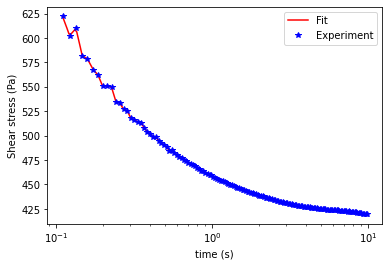

4400
4400
4400
[[0.01358025 0.0010248 ]
 [0.01358025 0.00140015]
 [0.01358025 0.0017755 ]
 ...
 [1.         0.99396293]
 [1.         0.99698147]
 [1.         1.        ]]


In [30]:
# time interval and shear interval of interest
timedomain = dde.geometry.TimeDomain(0,1) # non-dimensional end time
geom = dde.geometry.Interval(0,1) # non-dimensional shear rate
timexgeom = dde.geometry.GeometryXTime(geom, timedomain) # this is why geom is x[:,0:1] and time is x[:,1:2]?

# defining and initializing training model paramaters (to be determined by solving inverse problem)

G = dde.Variable(80.0) 
eta_s = dde.Variable(44.5) 
k_plus = dde.Variable(1.0) 
k_minus = dde.Variable(1.0)  
yield_stress = dde.Variable(10.0) #29.5
eta_p = dde.Variable(40.0)  #42

#yield_stress = 29.5 # Extrapolation to zero shear rate
#eta_p = 42.0  # Viscosity at 20/s - material totally fluidized


# defining the TEVP rheology model
def pde(x,y):
    
    stress, struct_param = y[:,0:1], y[:,1:2]
    shear_rate, t = x[:,0:1], x[:,1:2]
    
    stress_rate = dde.grad.jacobian(y,x,i=0,j=1)
    struct_rate = dde.grad.jacobian(y,x,i=1,j=1)
    
    eqn1 = stress_rate - (G*del_time)/((eta_s+eta_p)*del_stress)* \
           (-stress*del_stress - stress_min + yield_stress*struct_param \
            + (eta_s + eta_p*struct_param)*(shear_rate*del_shear_rate+shear_min)) # removed exponent n 
    
    eqn2 = struct_rate - del_time*(k_plus*(1-struct_param) - k_minus*struct_param*(shear_rate*del_shear_rate+shear_min))
                                  #+ k_2*(1-struct_param)*(shear_rate*del_shear_rate+shear_min)**0.5)
    return [eqn1,eqn2]


# training data
observe_x, shear_stress_training = gen_training_data() # observe_x gets shear rate and time 
print(observe_x)
observe_y1 = dde.PointSetBC(observe_x, shear_stress_training, component=0)  
# No observe_y2 as structure parameter not including in training data

# Initial condition
# ic_struct_param = dde.IC(timexgeom, lambda X: 1, lambda _,on_initial: on_initial, component=1) # Assigning lambda=1 at t=0


# defining the data 
data = dde.data.TimePDE(
    timexgeom,
    pde,
    [observe_y1], #ic_struct_param],# bc_left, bc_right],
    num_domain = 3000, 
    anchors = observe_x,
    num_test = 5000, 
    #num_initial = 200,
    train_distribution='pseudo', #pseudo
)

In [31]:
layer_size = [2] + [50]*4 + [2] # layer size dimensions [80]*4
activation = "tanh" 
initializer = "Glorot normal" # Xavier initialization

# developing the Neural network
net = dde.nn.FNN(layer_size, activation, initializer)

def output_transform(x,y):
    return tf.concat((y[:,0:1], tf.sigmoid(y[:,1:2])), axis=1)
    #return tf.sigmoid(y[:,1:2])

net.apply_output_transform(output_transform)

# developing the model
model = dde.Model(data,net)



In [32]:
# compiling the NN
model.compile("adam",
              lr=0.001, 
              loss_weights=[1,1,1e1], 
              external_trainable_variables=[G, eta_s, k_plus, k_minus,yield_stress,eta_p])

# extracting training parameters value any intermediate intervals and saving the file
variable = dde.callbacks.VariableValue([G, eta_s, k_plus, k_minus,yield_stress,eta_p], 
                                       period=1000, 
                                       filename="variables_DOWTC5622_TEVP1_7s_allvar.dat")


Compiling model...
Building feed-forward neural network...
'build' took 0.116146 s



C:\ProgramData\Anaconda3\lib\site-packages\deepxde\nn\tensorflow_compat_v1\fnn.py:110: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  kernel_constraint=self.kernel_constraint,
C:\ProgramData\Anaconda3\lib\site-packages\keras\legacy_tf_layers\core.py:255: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  return layer.apply(inputs)


'compile' took 0.939652 s



Initializing variables...
Training model...

0         [3.14e+01, 6.82e+02, 2.27e+00]    [2.66e+01, 6.15e+02, 2.27e+00]    []  
INFO:tensorflow:model-DOWTC5622-TEVP-final1-7s-allvar/model-DOWTC5622-TEVP-final1-1.ckpt is not in all_model_checkpoint_paths. Manually adding it.
1000      [8.36e-03, 3.34e-02, 6.18e-02]    [5.11e-03, 2.69e-02, 6.18e-02]    []  
INFO:tensorflow:model-DOWTC5622-TEVP-final1-7s-allvar/model-DOWTC5622-TEVP-final1-1000.ckpt is not in all_model_checkpoint_paths. Manually adding it.
2000      [1.04e-02, 2.42e-02, 5.53e-02]    [5.85e-03, 1.88e-02, 5.53e-02]    []  
INFO:tensorflow:model-DOWTC5622-TEVP-final1-7s-allvar/model-DOWTC5622-TEVP-final1-2000.ckpt is not in all_model_checkpoint_paths. Manually adding it.
3000      [1.27e-02, 1.51e-02, 4.96e-02]    [8.05e-03, 1.15e-02, 4.96e-02]    []  
INFO:tensorflow:model-DOWTC5622-TEVP-final1-7s-allvar/model-DOWTC5622-TEVP-final1-3000.ckpt is not in all_model_checkpoint_paths. Manually adding it.
4000      [9.52e-03, 7.30e

44000     [4.49e-03, 1.05e-03, 4.48e-03]    [4.49e-03, 1.14e-03, 4.48e-03]    []  
45000     [1.08e-04, 6.16e-06, 3.98e-03]    [7.96e-05, 8.66e-06, 3.98e-03]    []  
INFO:tensorflow:model-DOWTC5622-TEVP-final1-7s-allvar/model-DOWTC5622-TEVP-final1-45000.ckpt is not in all_model_checkpoint_paths. Manually adding it.
46000     [2.21e-04, 6.68e-05, 3.96e-03]    [1.56e-04, 7.66e-05, 3.96e-03]    []  
47000     [1.31e-04, 5.43e-04, 3.91e-03]    [7.27e-05, 5.30e-04, 3.91e-03]    []  
48000     [1.16e-04, 5.72e-06, 3.85e-03]    [9.67e-05, 8.01e-06, 3.85e-03]    []  
INFO:tensorflow:model-DOWTC5622-TEVP-final1-7s-allvar/model-DOWTC5622-TEVP-final1-48000.ckpt is not in all_model_checkpoint_paths. Manually adding it.
49000     [2.90e-03, 2.02e-03, 3.93e-03]    [3.21e-03, 2.09e-03, 3.93e-03]    []  
50000     [1.05e-04, 1.32e-05, 3.79e-03]    [6.76e-05, 1.88e-05, 3.79e-03]    []  
INFO:tensorflow:model-DOWTC5622-TEVP-final1-7s-allvar/model-DOWTC5622-TEVP-final1-50000.ckpt is not in all_model_chec

94000     [4.50e-05, 8.73e-06, 2.59e-03]    [2.89e-05, 1.19e-05, 2.59e-03]    []  
INFO:tensorflow:model-DOWTC5622-TEVP-final1-7s-allvar/model-DOWTC5622-TEVP-final1-94000.ckpt is not in all_model_checkpoint_paths. Manually adding it.
95000     [5.55e-05, 9.34e-06, 2.57e-03]    [3.12e-05, 1.11e-05, 2.57e-03]    []  
INFO:tensorflow:model-DOWTC5622-TEVP-final1-7s-allvar/model-DOWTC5622-TEVP-final1-95000.ckpt is not in all_model_checkpoint_paths. Manually adding it.
96000     [7.87e-04, 3.11e-04, 2.59e-03]    [7.95e-04, 3.69e-04, 2.59e-03]    []  
97000     [4.77e-05, 9.55e-06, 2.54e-03]    [2.86e-05, 1.63e-05, 2.54e-03]    []  
INFO:tensorflow:model-DOWTC5622-TEVP-final1-7s-allvar/model-DOWTC5622-TEVP-final1-97000.ckpt is not in all_model_checkpoint_paths. Manually adding it.
98000     [4.10e-05, 9.22e-06, 2.53e-03]    [2.60e-05, 1.38e-05, 2.53e-03]    []  
INFO:tensorflow:model-DOWTC5622-TEVP-final1-7s-allvar/model-DOWTC5622-TEVP-final1-98000.ckpt is not in all_model_checkpoint_paths. M

155000    [4.34e-05, 1.16e-05, 2.03e-03]    [2.80e-05, 1.28e-05, 2.03e-03]    []  
156000    [4.41e-05, 1.28e-05, 2.03e-03]    [2.99e-05, 1.42e-05, 2.03e-03]    []  
157000    [2.74e-04, 1.03e-04, 2.05e-03]    [2.62e-04, 1.14e-04, 2.05e-03]    []  
158000    [1.25e-04, 3.98e-05, 2.03e-03]    [1.17e-04, 4.42e-05, 2.03e-03]    []  
159000    [8.51e-04, 9.10e-04, 2.03e-03]    [8.51e-04, 9.64e-04, 2.03e-03]    []  
160000    [2.18e-04, 2.24e-05, 2.00e-03]    [1.58e-04, 1.68e-05, 2.00e-03]    []  
161000    [5.29e-05, 1.45e-05, 2.01e-03]    [4.35e-05, 2.09e-05, 2.01e-03]    []  
INFO:tensorflow:model-DOWTC5622-TEVP-final1-7s-allvar/model-DOWTC5622-TEVP-final1-161000.ckpt is not in all_model_checkpoint_paths. Manually adding it.
162000    [4.47e-05, 1.50e-05, 2.01e-03]    [4.17e-05, 2.42e-05, 2.01e-03]    []  
INFO:tensorflow:model-DOWTC5622-TEVP-final1-7s-allvar/model-DOWTC5622-TEVP-final1-162000.ckpt is not in all_model_checkpoint_paths. Manually adding it.
163000    [9.69e-05, 2.71e-05, 2

INFO:tensorflow:model-DOWTC5622-TEVP-final1-7s-allvar/model-DOWTC5622-TEVP-final1-217000.ckpt is not in all_model_checkpoint_paths. Manually adding it.
218000    [3.13e-05, 8.88e-06, 1.87e-03]    [2.57e-05, 1.04e-05, 1.87e-03]    []  
219000    [3.24e-05, 7.51e-06, 1.87e-03]    [2.51e-05, 8.31e-06, 1.87e-03]    []  
INFO:tensorflow:model-DOWTC5622-TEVP-final1-7s-allvar/model-DOWTC5622-TEVP-final1-219000.ckpt is not in all_model_checkpoint_paths. Manually adding it.
220000    [6.86e-04, 1.94e-05, 1.91e-03]    [6.95e-04, 1.60e-05, 1.91e-03]    []  
221000    [1.01e-04, 2.71e-04, 1.87e-03]    [1.13e-04, 2.96e-04, 1.87e-03]    []  
222000    [1.39e-03, 1.83e-04, 1.90e-03]    [1.37e-03, 2.03e-04, 1.90e-03]    []  
223000    [3.97e-04, 1.45e-04, 1.89e-03]    [4.13e-04, 1.47e-04, 1.89e-03]    []  
224000    [3.19e-05, 6.34e-06, 1.86e-03]    [2.54e-05, 8.70e-06, 1.86e-03]    []  
INFO:tensorflow:model-DOWTC5622-TEVP-final1-7s-allvar/model-DOWTC5622-TEVP-final1-224000.ckpt is not in all_model_c

INFO:tensorflow:model-DOWTC5622-TEVP-final1-7s-allvar/model-DOWTC5622-TEVP-final1-278000.ckpt is not in all_model_checkpoint_paths. Manually adding it.
279000    [1.28e-04, 3.29e-05, 1.81e-03]    [1.28e-04, 3.46e-05, 1.81e-03]    []  
280000    [2.86e-05, 4.34e-06, 1.81e-03]    [2.16e-05, 4.39e-06, 1.81e-03]    []  
INFO:tensorflow:model-DOWTC5622-TEVP-final1-7s-allvar/model-DOWTC5622-TEVP-final1-280000.ckpt is not in all_model_checkpoint_paths. Manually adding it.
281000    [3.07e-05, 5.15e-06, 1.81e-03]    [2.56e-05, 5.68e-06, 1.81e-03]    []  
282000    [2.86e-05, 4.65e-06, 1.81e-03]    [2.21e-05, 4.62e-06, 1.81e-03]    []  
INFO:tensorflow:model-DOWTC5622-TEVP-final1-7s-allvar/model-DOWTC5622-TEVP-final1-282000.ckpt is not in all_model_checkpoint_paths. Manually adding it.
283000    [2.95e-05, 4.51e-06, 1.81e-03]    [2.39e-05, 4.96e-06, 1.81e-03]    []  
284000    [6.22e-05, 1.18e-05, 1.81e-03]    [5.42e-05, 1.12e-05, 1.81e-03]    []  
285000    [4.31e-05, 8.70e-06, 1.81e-03]    [3

342000    [3.65e-04, 2.61e-05, 1.80e-03]    [3.67e-04, 2.87e-05, 1.80e-03]    []  
343000    [7.14e-04, 1.50e-04, 1.79e-03]    [6.90e-04, 1.61e-04, 1.79e-03]    []  
344000    [2.65e-05, 5.50e-06, 1.78e-03]    [2.17e-05, 5.64e-06, 1.78e-03]    []  
INFO:tensorflow:model-DOWTC5622-TEVP-final1-7s-allvar/model-DOWTC5622-TEVP-final1-344000.ckpt is not in all_model_checkpoint_paths. Manually adding it.
345000    [2.65e-05, 5.50e-06, 1.77e-03]    [2.11e-05, 5.15e-06, 1.77e-03]    []  
INFO:tensorflow:model-DOWTC5622-TEVP-final1-7s-allvar/model-DOWTC5622-TEVP-final1-345000.ckpt is not in all_model_checkpoint_paths. Manually adding it.
346000    [1.53e-03, 3.59e-04, 1.81e-03]    [1.61e-03, 3.80e-04, 1.81e-03]    []  
347000    [4.56e-05, 1.18e-05, 1.77e-03]    [4.40e-05, 1.12e-05, 1.77e-03]    []  
348000    [1.03e-04, 2.36e-05, 1.77e-03]    [9.44e-05, 2.40e-05, 1.77e-03]    []  
349000    [2.67e-05, 5.69e-06, 1.77e-03]    [2.12e-05, 6.02e-06, 1.77e-03]    []  
INFO:tensorflow:model-DOWTC5622-

INFO:tensorflow:model-DOWTC5622-TEVP-final1-7s-allvar/model-DOWTC5622-TEVP-final1-404000.ckpt is not in all_model_checkpoint_paths. Manually adding it.
405000    [2.69e-05, 1.02e-05, 1.74e-03]    [1.96e-05, 6.19e-06, 1.74e-03]    []  
406000    [2.49e-05, 7.92e-06, 1.74e-03]    [2.15e-05, 5.15e-06, 1.74e-03]    []  
INFO:tensorflow:model-DOWTC5622-TEVP-final1-7s-allvar/model-DOWTC5622-TEVP-final1-406000.ckpt is not in all_model_checkpoint_paths. Manually adding it.
407000    [1.07e-03, 2.27e-04, 1.77e-03]    [1.07e-03, 2.28e-04, 1.77e-03]    []  
408000    [4.95e-05, 1.21e-05, 1.74e-03]    [4.17e-05, 1.02e-05, 1.74e-03]    []  
409000    [2.49e-05, 7.97e-06, 1.74e-03]    [2.25e-05, 5.31e-06, 1.74e-03]    []  
INFO:tensorflow:model-DOWTC5622-TEVP-final1-7s-allvar/model-DOWTC5622-TEVP-final1-409000.ckpt is not in all_model_checkpoint_paths. Manually adding it.
410000    [3.48e-05, 1.18e-05, 1.74e-03]    [3.19e-05, 8.25e-06, 1.74e-03]    []  
411000    [1.01e-04, 1.74e-05, 1.74e-03]    [1

455000    [2.65e-05, 1.30e-05, 1.64e-03]    [2.65e-05, 7.15e-06, 1.64e-03]    []  
456000    [3.30e-04, 2.66e-05, 1.65e-03]    [2.90e-04, 2.01e-05, 1.65e-03]    []  
457000    [1.61e-04, 3.15e-05, 1.64e-03]    [1.16e-04, 1.82e-05, 1.64e-03]    []  
458000    [1.04e-04, 3.31e-05, 1.63e-03]    [7.20e-05, 3.27e-05, 1.63e-03]    []  
459000    [2.23e-05, 1.52e-05, 1.63e-03]    [2.03e-05, 9.86e-06, 1.63e-03]    []  
INFO:tensorflow:model-DOWTC5622-TEVP-final1-7s-allvar/model-DOWTC5622-TEVP-final1-459000.ckpt is not in all_model_checkpoint_paths. Manually adding it.
460000    [2.36e-05, 1.23e-05, 1.62e-03]    [2.23e-05, 6.53e-06, 1.62e-03]    []  
INFO:tensorflow:model-DOWTC5622-TEVP-final1-7s-allvar/model-DOWTC5622-TEVP-final1-460000.ckpt is not in all_model_checkpoint_paths. Manually adding it.
461000    [2.59e-05, 1.24e-05, 1.61e-03]    [2.53e-05, 6.46e-06, 1.61e-03]    []  
INFO:tensorflow:model-DOWTC5622-TEVP-final1-7s-allvar/model-DOWTC5622-TEVP-final1-461000.ckpt is not in all_model_c

510000    [1.83e-05, 8.67e-06, 1.36e-03]    [1.86e-05, 5.90e-06, 1.36e-03]    []  
INFO:tensorflow:model-DOWTC5622-TEVP-final1-7s-allvar/model-DOWTC5622-TEVP-final1-510000.ckpt is not in all_model_checkpoint_paths. Manually adding it.
511000    [1.90e-05, 8.73e-06, 1.36e-03]    [1.95e-05, 6.07e-06, 1.36e-03]    []  
INFO:tensorflow:model-DOWTC5622-TEVP-final1-7s-allvar/model-DOWTC5622-TEVP-final1-511000.ckpt is not in all_model_checkpoint_paths. Manually adding it.
512000    [6.05e-05, 1.33e-05, 1.35e-03]    [6.51e-05, 9.79e-06, 1.35e-03]    []  
513000    [4.60e-05, 9.30e-06, 1.35e-03]    [4.52e-05, 7.86e-06, 1.35e-03]    []  
514000    [7.94e-05, 1.46e-05, 1.34e-03]    [7.07e-05, 9.33e-06, 1.34e-03]    []  
515000    [1.73e-05, 7.54e-06, 1.34e-03]    [1.66e-05, 5.80e-06, 1.34e-03]    []  
INFO:tensorflow:model-DOWTC5622-TEVP-final1-7s-allvar/model-DOWTC5622-TEVP-final1-515000.ckpt is not in all_model_checkpoint_paths. Manually adding it.
516000    [1.90e-05, 8.27e-06, 1.34e-03]    [1

563000    [2.09e-05, 5.47e-06, 1.25e-03]    [1.88e-05, 5.23e-06, 1.25e-03]    []  
564000    [7.21e-05, 1.33e-05, 1.25e-03]    [7.83e-05, 1.62e-05, 1.25e-03]    []  
565000    [2.37e-05, 1.46e-05, 1.25e-03]    [2.87e-05, 1.57e-05, 1.25e-03]    []  
566000    [1.99e-05, 5.29e-06, 1.24e-03]    [2.05e-05, 4.89e-06, 1.24e-03]    []  
INFO:tensorflow:model-DOWTC5622-TEVP-final1-7s-allvar/model-DOWTC5622-TEVP-final1-566000.ckpt is not in all_model_checkpoint_paths. Manually adding it.
567000    [2.40e-04, 5.68e-06, 1.26e-03]    [2.65e-04, 5.91e-06, 1.26e-03]    []  
568000    [4.49e-04, 7.12e-05, 1.27e-03]    [3.94e-04, 6.52e-05, 1.27e-03]    []  
569000    [1.89e-05, 5.71e-06, 1.24e-03]    [2.12e-05, 5.94e-06, 1.24e-03]    []  
INFO:tensorflow:model-DOWTC5622-TEVP-final1-7s-allvar/model-DOWTC5622-TEVP-final1-569000.ckpt is not in all_model_checkpoint_paths. Manually adding it.
570000    [5.20e-05, 7.61e-06, 1.24e-03]    [5.76e-05, 8.80e-06, 1.24e-03]    []  
571000    [1.23e-05, 5.36e-06, 1

617000    [1.87e-05, 5.78e-06, 1.14e-03]    [1.56e-05, 5.38e-06, 1.14e-03]    []  
618000    [1.40e-05, 7.16e-06, 1.14e-03]    [1.52e-05, 7.47e-06, 1.14e-03]    []  
INFO:tensorflow:model-DOWTC5622-TEVP-final1-7s-allvar/model-DOWTC5622-TEVP-final1-618000.ckpt is not in all_model_checkpoint_paths. Manually adding it.
619000    [1.13e-04, 7.15e-06, 1.13e-03]    [1.17e-04, 5.14e-06, 1.13e-03]    []  
620000    [1.64e-05, 5.43e-06, 1.13e-03]    [1.38e-05, 5.13e-06, 1.13e-03]    []  
INFO:tensorflow:model-DOWTC5622-TEVP-final1-7s-allvar/model-DOWTC5622-TEVP-final1-620000.ckpt is not in all_model_checkpoint_paths. Manually adding it.
621000    [2.10e-05, 5.17e-06, 1.13e-03]    [1.62e-05, 4.97e-06, 1.13e-03]    []  
622000    [6.11e-05, 5.85e-06, 1.13e-03]    [6.41e-05, 5.83e-06, 1.13e-03]    []  
623000    [4.54e-04, 9.76e-06, 1.13e-03]    [4.82e-04, 1.07e-05, 1.13e-03]    []  
624000    [9.72e-06, 5.08e-06, 1.12e-03]    [8.35e-06, 4.49e-06, 1.12e-03]    []  
INFO:tensorflow:model-DOWTC5622-

INFO:tensorflow:model-DOWTC5622-TEVP-final1-7s-allvar/model-DOWTC5622-TEVP-final1-668000.ckpt is not in all_model_checkpoint_paths. Manually adding it.
669000    [2.89e-05, 4.97e-06, 1.03e-03]    [2.69e-05, 3.85e-06, 1.03e-03]    []  
670000    [8.57e-06, 4.77e-06, 1.03e-03]    [7.14e-06, 4.43e-06, 1.03e-03]    []  
INFO:tensorflow:model-DOWTC5622-TEVP-final1-7s-allvar/model-DOWTC5622-TEVP-final1-670000.ckpt is not in all_model_checkpoint_paths. Manually adding it.
671000    [8.29e-06, 4.44e-06, 1.03e-03]    [7.00e-06, 4.02e-06, 1.03e-03]    []  
INFO:tensorflow:model-DOWTC5622-TEVP-final1-7s-allvar/model-DOWTC5622-TEVP-final1-671000.ckpt is not in all_model_checkpoint_paths. Manually adding it.
672000    [8.28e-06, 4.47e-06, 1.03e-03]    [6.95e-06, 3.98e-06, 1.03e-03]    []  
INFO:tensorflow:model-DOWTC5622-TEVP-final1-7s-allvar/model-DOWTC5622-TEVP-final1-672000.ckpt is not in all_model_checkpoint_paths. Manually adding it.
673000    [8.33e-06, 4.42e-06, 1.03e-03]    [6.41e-06, 3.87e

721000    [7.33e-04, 5.03e-06, 9.60e-04]    [7.25e-04, 5.19e-06, 9.60e-04]    []  
722000    [8.58e-06, 4.39e-06, 9.48e-04]    [6.58e-06, 3.86e-06, 9.48e-04]    []  
INFO:tensorflow:model-DOWTC5622-TEVP-final1-7s-allvar/model-DOWTC5622-TEVP-final1-722000.ckpt is not in all_model_checkpoint_paths. Manually adding it.
723000    [7.88e-06, 4.15e-06, 9.46e-04]    [6.09e-06, 3.80e-06, 9.46e-04]    []  
INFO:tensorflow:model-DOWTC5622-TEVP-final1-7s-allvar/model-DOWTC5622-TEVP-final1-723000.ckpt is not in all_model_checkpoint_paths. Manually adding it.
724000    [7.81e-06, 3.99e-06, 9.44e-04]    [6.18e-06, 3.67e-06, 9.44e-04]    []  
INFO:tensorflow:model-DOWTC5622-TEVP-final1-7s-allvar/model-DOWTC5622-TEVP-final1-724000.ckpt is not in all_model_checkpoint_paths. Manually adding it.
725000    [1.40e-05, 4.30e-06, 9.43e-04]    [1.42e-05, 4.23e-06, 9.43e-04]    []  
726000    [1.46e-04, 6.34e-06, 9.43e-04]    [1.48e-04, 4.70e-06, 9.43e-04]    []  
727000    [7.74e-06, 4.01e-06, 9.40e-04]    [5

774000    [6.17e-05, 3.76e-06, 8.80e-04]    [6.11e-05, 3.59e-06, 8.80e-04]    []  
775000    [2.23e-04, 1.83e-05, 8.77e-04]    [1.83e-04, 1.31e-05, 8.77e-04]    []  
776000    [9.50e-06, 3.69e-06, 8.76e-04]    [7.89e-06, 3.65e-06, 8.76e-04]    []  
INFO:tensorflow:model-DOWTC5622-TEVP-final1-7s-allvar/model-DOWTC5622-TEVP-final1-776000.ckpt is not in all_model_checkpoint_paths. Manually adding it.
777000    [9.18e-06, 3.57e-06, 8.76e-04]    [5.98e-06, 3.32e-06, 8.76e-04]    []  
INFO:tensorflow:model-DOWTC5622-TEVP-final1-7s-allvar/model-DOWTC5622-TEVP-final1-777000.ckpt is not in all_model_checkpoint_paths. Manually adding it.
778000    [5.84e-04, 6.17e-06, 8.82e-04]    [5.94e-04, 4.42e-06, 8.82e-04]    []  
779000    [1.96e-04, 8.51e-06, 8.83e-04]    [1.44e-04, 8.13e-06, 8.83e-04]    []  
780000    [1.29e-05, 3.56e-06, 8.71e-04]    [1.01e-05, 3.24e-06, 8.71e-04]    []  
INFO:tensorflow:model-DOWTC5622-TEVP-final1-7s-allvar/model-DOWTC5622-TEVP-final1-780000.ckpt is not in all_model_c

INFO:tensorflow:model-DOWTC5622-TEVP-final1-7s-allvar/model-DOWTC5622-TEVP-final1-823000.ckpt is not in all_model_checkpoint_paths. Manually adding it.
824000    [7.47e-06, 3.17e-06, 8.25e-04]    [4.95e-06, 2.85e-06, 8.25e-04]    []  
INFO:tensorflow:model-DOWTC5622-TEVP-final1-7s-allvar/model-DOWTC5622-TEVP-final1-824000.ckpt is not in all_model_checkpoint_paths. Manually adding it.
825000    [9.05e-06, 4.15e-06, 8.25e-04]    [6.37e-06, 4.22e-06, 8.25e-04]    []  
826000    [8.42e-06, 3.21e-06, 8.23e-04]    [6.42e-06, 2.83e-06, 8.23e-04]    []  
INFO:tensorflow:model-DOWTC5622-TEVP-final1-7s-allvar/model-DOWTC5622-TEVP-final1-826000.ckpt is not in all_model_checkpoint_paths. Manually adding it.
827000    [7.31e-06, 3.22e-06, 8.22e-04]    [5.40e-06, 2.89e-06, 8.22e-04]    []  
INFO:tensorflow:model-DOWTC5622-TEVP-final1-7s-allvar/model-DOWTC5622-TEVP-final1-827000.ckpt is not in all_model_checkpoint_paths. Manually adding it.
828000    [7.43e-06, 3.20e-06, 8.21e-04]    [5.16e-06, 2.88e

INFO:tensorflow:model-DOWTC5622-TEVP-final1-7s-allvar/model-DOWTC5622-TEVP-final1-880000.ckpt is not in all_model_checkpoint_paths. Manually adding it.
881000    [4.94e-05, 2.92e-06, 7.77e-04]    [4.29e-05, 2.20e-06, 7.77e-04]    []  
882000    [9.21e-06, 3.13e-06, 7.76e-04]    [6.90e-06, 2.42e-06, 7.76e-04]    []  
INFO:tensorflow:model-DOWTC5622-TEVP-final1-7s-allvar/model-DOWTC5622-TEVP-final1-882000.ckpt is not in all_model_checkpoint_paths. Manually adding it.
883000    [7.08e-06, 2.94e-06, 7.75e-04]    [4.92e-06, 2.41e-06, 7.75e-04]    []  
INFO:tensorflow:model-DOWTC5622-TEVP-final1-7s-allvar/model-DOWTC5622-TEVP-final1-883000.ckpt is not in all_model_checkpoint_paths. Manually adding it.
884000    [7.92e-04, 2.24e-05, 7.83e-04]    [8.70e-04, 1.85e-05, 7.83e-04]    []  
885000    [7.19e-06, 2.91e-06, 7.73e-04]    [4.79e-06, 2.28e-06, 7.73e-04]    []  
INFO:tensorflow:model-DOWTC5622-TEVP-final1-7s-allvar/model-DOWTC5622-TEVP-final1-885000.ckpt is not in all_model_checkpoint_path

931000    [1.95e-05, 2.81e-06, 7.42e-04]    [1.44e-05, 2.11e-06, 7.42e-04]    []  
932000    [9.53e-06, 3.71e-06, 7.40e-04]    [8.98e-06, 2.79e-06, 7.40e-04]    []  
933000    [3.43e-05, 3.07e-06, 7.40e-04]    [3.45e-05, 2.32e-06, 7.40e-04]    []  
934000    [6.70e-06, 2.94e-06, 7.39e-04]    [5.25e-06, 2.14e-06, 7.39e-04]    []  
INFO:tensorflow:model-DOWTC5622-TEVP-final1-7s-allvar/model-DOWTC5622-TEVP-final1-934000.ckpt is not in all_model_checkpoint_paths. Manually adding it.
935000    [6.92e-06, 2.91e-06, 7.38e-04]    [5.33e-06, 1.97e-06, 7.38e-04]    []  
INFO:tensorflow:model-DOWTC5622-TEVP-final1-7s-allvar/model-DOWTC5622-TEVP-final1-935000.ckpt is not in all_model_checkpoint_paths. Manually adding it.
936000    [6.73e-06, 2.91e-06, 7.37e-04]    [4.73e-06, 2.00e-06, 7.37e-04]    []  
INFO:tensorflow:model-DOWTC5622-TEVP-final1-7s-allvar/model-DOWTC5622-TEVP-final1-936000.ckpt is not in all_model_checkpoint_paths. Manually adding it.
937000    [3.25e-04, 2.09e-05, 7.39e-04]    [3

992000    [1.02e-05, 3.04e-06, 7.06e-04]    [7.21e-06, 2.05e-06, 7.06e-04]    []  
993000    [7.79e-05, 1.06e-05, 7.20e-04]    [5.49e-05, 7.38e-06, 7.20e-04]    []  
994000    [6.87e-06, 3.03e-06, 7.05e-04]    [5.01e-06, 2.08e-06, 7.05e-04]    []  
INFO:tensorflow:model-DOWTC5622-TEVP-final1-7s-allvar/model-DOWTC5622-TEVP-final1-994000.ckpt is not in all_model_checkpoint_paths. Manually adding it.
995000    [6.80e-06, 2.98e-06, 7.04e-04]    [5.25e-06, 2.03e-06, 7.04e-04]    []  
INFO:tensorflow:model-DOWTC5622-TEVP-final1-7s-allvar/model-DOWTC5622-TEVP-final1-995000.ckpt is not in all_model_checkpoint_paths. Manually adding it.
996000    [1.32e-05, 3.06e-06, 7.03e-04]    [9.90e-06, 2.03e-06, 7.03e-04]    []  
997000    [7.90e-06, 2.94e-06, 7.03e-04]    [5.90e-06, 1.93e-06, 7.03e-04]    []  
998000    [7.22e-06, 2.90e-06, 7.03e-04]    [5.26e-06, 1.96e-06, 7.03e-04]    []  
INFO:tensorflow:model-DOWTC5622-TEVP-final1-7s-allvar/model-DOWTC5622-TEVP-final1-998000.ckpt is not in all_model_c

1053000   [1.99e-05, 2.91e-06, 6.79e-04]    [1.47e-05, 2.14e-06, 6.79e-04]    []  
1054000   [6.27e-06, 3.06e-06, 6.78e-04]    [5.35e-06, 2.25e-06, 6.78e-04]    []  
INFO:tensorflow:model-DOWTC5622-TEVP-final1-7s-allvar/model-DOWTC5622-TEVP-final1-1054000.ckpt is not in all_model_checkpoint_paths. Manually adding it.
1055000   [3.22e-04, 5.02e-06, 6.83e-04]    [3.30e-04, 3.08e-06, 6.83e-04]    []  
1056000   [3.75e-05, 3.20e-06, 6.77e-04]    [3.46e-05, 2.34e-06, 6.77e-04]    []  
1057000   [6.97e-06, 3.18e-06, 6.77e-04]    [4.91e-06, 2.17e-06, 6.77e-04]    []  
INFO:tensorflow:model-DOWTC5622-TEVP-final1-7s-allvar/model-DOWTC5622-TEVP-final1-1057000.ckpt is not in all_model_checkpoint_paths. Manually adding it.
1058000   [7.12e-04, 5.19e-06, 6.83e-04]    [6.87e-04, 4.04e-06, 6.83e-04]    []  
1059000   [9.17e-05, 5.20e-06, 6.76e-04]    [7.26e-05, 3.34e-06, 6.76e-04]    []  
1060000   [3.44e-05, 3.34e-06, 6.76e-04]    [3.58e-05, 2.57e-06, 6.76e-04]    []  
1061000   [6.85e-06, 3.17e-06,

1113000   [8.67e-06, 3.34e-06, 6.57e-04]    [7.83e-06, 2.31e-06, 6.57e-04]    []  
1114000   [5.95e-06, 3.30e-06, 6.56e-04]    [4.35e-06, 2.27e-06, 6.56e-04]    []  
INFO:tensorflow:model-DOWTC5622-TEVP-final1-7s-allvar/model-DOWTC5622-TEVP-final1-1114000.ckpt is not in all_model_checkpoint_paths. Manually adding it.
1115000   [7.38e-06, 3.25e-06, 6.56e-04]    [5.44e-06, 2.32e-06, 6.56e-04]    []  
1116000   [6.42e-06, 3.20e-06, 6.56e-04]    [4.34e-06, 2.34e-06, 6.56e-04]    []  
INFO:tensorflow:model-DOWTC5622-TEVP-final1-7s-allvar/model-DOWTC5622-TEVP-final1-1116000.ckpt is not in all_model_checkpoint_paths. Manually adding it.
1117000   [6.98e-06, 3.63e-06, 6.55e-04]    [5.32e-06, 2.52e-06, 6.55e-04]    []  
1118000   [6.03e-06, 3.35e-06, 6.55e-04]    [4.48e-06, 2.34e-06, 6.55e-04]    []  
INFO:tensorflow:model-DOWTC5622-TEVP-final1-7s-allvar/model-DOWTC5622-TEVP-final1-1118000.ckpt is not in all_model_checkpoint_paths. Manually adding it.
1119000   [6.49e-06, 3.33e-06, 6.54e-04]   

1172000   [1.00e-04, 4.02e-06, 6.41e-04]    [1.04e-04, 2.97e-06, 6.41e-04]    []  
1173000   [5.73e-06, 3.33e-06, 6.39e-04]    [3.90e-06, 2.35e-06, 6.39e-04]    []  
INFO:tensorflow:model-DOWTC5622-TEVP-final1-7s-allvar/model-DOWTC5622-TEVP-final1-1173000.ckpt is not in all_model_checkpoint_paths. Manually adding it.
1174000   [1.18e-03, 2.99e-05, 6.47e-04]    [1.25e-03, 2.41e-05, 6.47e-04]    []  
1175000   [9.35e-05, 5.94e-06, 6.39e-04]    [7.84e-05, 4.41e-06, 6.39e-04]    []  
1176000   [2.59e-05, 4.69e-06, 6.39e-04]    [2.30e-05, 3.28e-06, 6.39e-04]    []  
1177000   [2.49e-05, 3.36e-06, 6.38e-04]    [1.85e-05, 2.28e-06, 6.38e-04]    []  
1178000   [2.23e-04, 4.94e-06, 6.39e-04]    [2.32e-04, 3.55e-06, 6.39e-04]    []  
1179000   [5.91e-06, 3.42e-06, 6.37e-04]    [3.92e-06, 2.36e-06, 6.37e-04]    []  
INFO:tensorflow:model-DOWTC5622-TEVP-final1-7s-allvar/model-DOWTC5622-TEVP-final1-1179000.ckpt is not in all_model_checkpoint_paths. Manually adding it.
1180000   [5.69e-06, 3.39e-06,

1231000   [5.53e-06, 3.38e-06, 6.25e-04]    [4.23e-06, 2.27e-06, 6.25e-04]    []  
INFO:tensorflow:model-DOWTC5622-TEVP-final1-7s-allvar/model-DOWTC5622-TEVP-final1-1231000.ckpt is not in all_model_checkpoint_paths. Manually adding it.
1232000   [5.64e-06, 3.56e-06, 6.25e-04]    [3.83e-06, 2.50e-06, 6.25e-04]    []  
1233000   [5.64e-04, 2.97e-05, 6.36e-04]    [5.92e-04, 1.93e-05, 6.36e-04]    []  
1234000   [5.10e-06, 3.39e-06, 6.26e-04]    [4.24e-06, 2.43e-06, 6.26e-04]    []  
1235000   [3.08e-04, 5.40e-06, 6.28e-04]    [3.20e-04, 3.93e-06, 6.28e-04]    []  
1236000   [5.42e-04, 6.32e-05, 6.29e-04]    [6.26e-04, 4.65e-05, 6.29e-04]    []  
1237000   [5.52e-06, 3.35e-06, 6.24e-04]    [3.91e-06, 2.39e-06, 6.24e-04]    []  
INFO:tensorflow:model-DOWTC5622-TEVP-final1-7s-allvar/model-DOWTC5622-TEVP-final1-1237000.ckpt is not in all_model_checkpoint_paths. Manually adding it.
1238000   [5.94e-06, 3.46e-06, 6.24e-04]    [3.65e-06, 2.34e-06, 6.24e-04]    []  
INFO:tensorflow:model-DOWTC562

INFO:tensorflow:model-DOWTC5622-TEVP-final1-7s-allvar/model-DOWTC5622-TEVP-final1-1292000.ckpt is not in all_model_checkpoint_paths. Manually adding it.
1293000   [9.35e-06, 3.32e-06, 6.12e-04]    [7.20e-06, 2.22e-06, 6.12e-04]    []  
1294000   [2.05e-05, 3.34e-06, 6.12e-04]    [1.80e-05, 2.26e-06, 6.12e-04]    []  
1295000   [5.31e-06, 3.30e-06, 6.12e-04]    [3.73e-06, 2.23e-06, 6.12e-04]    []  
INFO:tensorflow:model-DOWTC5622-TEVP-final1-7s-allvar/model-DOWTC5622-TEVP-final1-1295000.ckpt is not in all_model_checkpoint_paths. Manually adding it.
1296000   [5.04e-06, 3.37e-06, 6.12e-04]    [3.78e-06, 2.25e-06, 6.12e-04]    []  
INFO:tensorflow:model-DOWTC5622-TEVP-final1-7s-allvar/model-DOWTC5622-TEVP-final1-1296000.ckpt is not in all_model_checkpoint_paths. Manually adding it.
1297000   [1.68e-05, 3.45e-06, 6.12e-04]    [1.37e-05, 2.28e-06, 6.12e-04]    []  
1298000   [1.14e-04, 4.32e-06, 6.12e-04]    [1.18e-04, 3.03e-06, 6.12e-04]    []  
1299000   [1.88e-04, 3.41e-05, 6.56e-04]   

1355000   [5.19e-06, 3.33e-06, 6.02e-04]    [3.81e-06, 2.20e-06, 6.02e-04]    []  
INFO:tensorflow:model-DOWTC5622-TEVP-final1-7s-allvar/model-DOWTC5622-TEVP-final1-1355000.ckpt is not in all_model_checkpoint_paths. Manually adding it.
1356000   [1.54e-05, 3.52e-06, 6.02e-04]    [1.58e-05, 2.29e-06, 6.02e-04]    []  
1357000   [5.08e-05, 5.04e-06, 6.08e-04]    [4.18e-05, 3.53e-06, 6.08e-04]    []  
1358000   [2.26e-04, 5.51e-06, 6.04e-04]    [1.94e-04, 2.81e-06, 6.04e-04]    []  
1359000   [5.32e-06, 3.36e-06, 6.02e-04]    [3.34e-06, 2.08e-06, 6.02e-04]    []  
INFO:tensorflow:model-DOWTC5622-TEVP-final1-7s-allvar/model-DOWTC5622-TEVP-final1-1359000.ckpt is not in all_model_checkpoint_paths. Manually adding it.
1360000   [1.72e-05, 3.82e-06, 6.04e-04]    [1.37e-05, 2.39e-06, 6.04e-04]    []  
1361000   [3.80e-05, 5.54e-06, 6.01e-04]    [2.76e-05, 3.54e-06, 6.01e-04]    []  
1362000   [5.76e-06, 3.39e-06, 6.01e-04]    [3.77e-06, 2.18e-06, 6.01e-04]    []  
INFO:tensorflow:model-DOWTC562

1420000   [5.19e-06, 3.33e-06, 5.92e-04]    [3.73e-06, 2.15e-06, 5.92e-04]    []  
INFO:tensorflow:model-DOWTC5622-TEVP-final1-7s-allvar/model-DOWTC5622-TEVP-final1-1420000.ckpt is not in all_model_checkpoint_paths. Manually adding it.
1421000   [1.64e-05, 3.33e-06, 5.92e-04]    [1.69e-05, 2.22e-06, 5.92e-04]    []  
1422000   [7.44e-05, 3.87e-06, 5.92e-04]    [6.79e-05, 2.47e-06, 5.92e-04]    []  
1423000   [5.47e-06, 3.22e-06, 5.92e-04]    [3.91e-06, 2.14e-06, 5.92e-04]    []  
INFO:tensorflow:model-DOWTC5622-TEVP-final1-7s-allvar/model-DOWTC5622-TEVP-final1-1423000.ckpt is not in all_model_checkpoint_paths. Manually adding it.
1424000   [1.23e-03, 2.31e-05, 6.19e-04]    [1.22e-03, 1.52e-05, 6.19e-04]    []  
1425000   [5.96e-06, 3.87e-06, 5.92e-04]    [4.11e-06, 2.51e-06, 5.92e-04]    []  
1426000   [5.27e-06, 3.36e-06, 5.91e-04]    [3.68e-06, 2.12e-06, 5.91e-04]    []  
INFO:tensorflow:model-DOWTC5622-TEVP-final1-7s-allvar/model-DOWTC5622-TEVP-final1-1426000.ckpt is not in all_mode

1484000   [4.17e-04, 4.88e-06, 5.87e-04]    [4.24e-04, 3.61e-06, 5.87e-04]    []  
1485000   [7.23e-06, 3.34e-06, 5.84e-04]    [6.53e-06, 2.18e-06, 5.84e-04]    []  
1486000   [4.59e-04, 4.85e-06, 5.86e-04]    [4.51e-04, 3.20e-06, 5.86e-04]    []  
1487000   [5.36e-06, 3.32e-06, 5.83e-04]    [4.58e-06, 2.38e-06, 5.83e-04]    []  
1488000   [5.68e-06, 3.45e-06, 5.83e-04]    [5.43e-06, 2.27e-06, 5.83e-04]    []  
1489000   [1.64e-05, 3.26e-06, 5.83e-04]    [1.46e-05, 2.19e-06, 5.83e-04]    []  
1490000   [5.26e-05, 4.43e-06, 5.83e-04]    [4.94e-05, 3.10e-06, 5.83e-04]    []  
1491000   [5.22e-06, 3.54e-06, 5.83e-04]    [4.22e-06, 2.24e-06, 5.83e-04]    []  
INFO:tensorflow:model-DOWTC5622-TEVP-final1-7s-allvar/model-DOWTC5622-TEVP-final1-1491000.ckpt is not in all_model_checkpoint_paths. Manually adding it.
1492000   [1.01e-05, 3.25e-06, 5.83e-04]    [7.58e-06, 2.12e-06, 5.83e-04]    []  
1493000   [7.53e-06, 3.39e-06, 5.83e-04]    [7.65e-06, 2.34e-06, 5.83e-04]    []  
1494000   [5.07e-

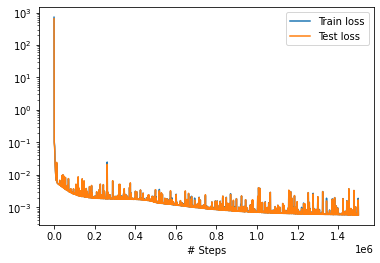

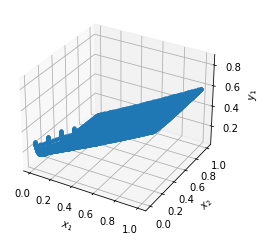

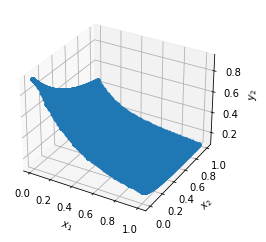

In [33]:

# saving model at intermediate steps
checkpointer = dde.callbacks.ModelCheckpoint(
     "model-DOWTC5622-TEVP-final1-7s-allvar/model-DOWTC5622-TEVP-final1", verbose=0, save_better_only=True
 )

# Resampling PDE loss data points
resampler = dde.callbacks.PDEResidualResampler(period=1000)

#training the model 
losshistory, trainstate = model.train(epochs = 1500000, callbacks = [variable, checkpointer, resampler],model_save_path='C/model-DOWTC5622-TEVP-final1-7s-allvar') 


dde.saveplot(losshistory, trainstate, issave=True, isplot=True)



In [82]:
# experimental data to validate the model results (sheet name corresponds to shear rate value from expt) #

valPoints = pd.read_excel('DOWTC5622-09-02-22.xlsx',header = None, names=['shear rate','t','shear stress'], sheet_name=1,skiprows=range(148,296))

t_expt1 = np.array(valPoints["t"])
t_expt1 = t_expt1[:,np.newaxis] # Converting to a column vector
#print(t_expt1)
gammadot1 = np.array(valPoints["shear rate"])
gammadot1 = gammadot1[:,np.newaxis]
#print(gammadot1)1
shear_stress1 = np.array(valPoints["shear stress"])
shear_stress1 = shear_stress1[:,np.newaxis] # experiment value
#print(shear_stress1)

t_non_dim =  (t_expt1-time_min)/(del_time) #(t_expt1-0.5)/(600.0-0.5)
gammadot_non_dim = (gammadot1-shear_min)/(del_shear_rate) # (gammadot1-0.1)/(20.0-0.1)               

# using model to predict shear stress at a new shear rate #

test_data_set = np.hstack((gammadot_non_dim,t_non_dim))
#print(test_data_set)
test_shear_stress = model.predict(test_data_set,operator=lambda x,y: y[:,0:1]) # only predicting the shear stress and not struct param
test_struct_param = model.predict(test_data_set,operator=lambda x,y: y[:,1:2])
# making non-dimensional to dimensional
test_shear_stress = test_shear_stress*(del_stress) + stress_min
#test_shear_stress = np.exp(test_shear_stress)

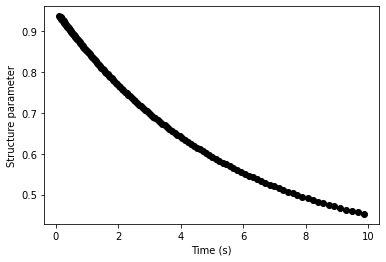

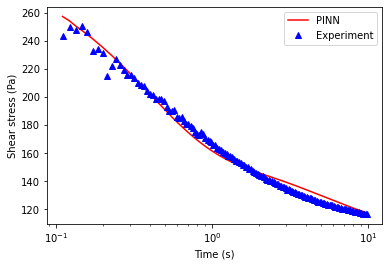

In [83]:
# plotting
plt.figure()
plt.plot(t_expt1,test_struct_param, 'ok', label='PINN-Structure-Parameter')
plt.title('')
plt.xlabel('Time (s)')
plt.ylabel('Structure parameter')
#plt.savefig('Structure_Paramater_6s_DOW340.pdf')
plt.show()


plt.figure()
plt.plot(t_expt1,test_shear_stress, '-r', label='PINN')
plt.plot(t_expt1,shear_stress1, '^b', label='Experiment')
plt.legend()
plt.xscale('log')
#plt.title('8/s - prediction')
plt.xlabel('Time (s)')
plt.ylabel('Shear stress (Pa)')
#plt.savefig('Shear_stress_6s_DOW340.pdf')
plt.show()


In [79]:
# Restore the saved model with the smallest training loss - Run initial steps until compilation
# enter the correct model number
model.restore(f"model-DOWTC5622-TEVP-final1-7s-allvar/model-DOWTC5622-TEVP-final1-1494000.ckpt", verbose=1)


Restoring model from model-DOWTC5622-TEVP-final1-7s-allvar/model-DOWTC5622-TEVP-final1-1494000.ckpt ...

INFO:tensorflow:Restoring parameters from model-DOWTC5622-TEVP-final1-7s-allvar/model-DOWTC5622-TEVP-final1-1494000.ckpt


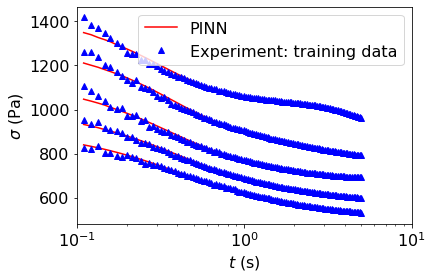

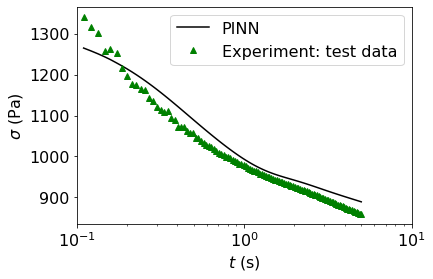

In [136]:
# Plotting #
plt.rcParams.update({'font.size': 16})

for itrnew in range(1,10):
    if itrnew == 6:
        continue
    valPoints = pd.read_excel('DOWTC5622-09-02-22.xlsx',header = None, names=['shear rate','t','shear stress'], sheet_name=itrnew,skiprows=range(148,296))
    
    t_expt1 = np.array(valPoints["t"])
    t_expt1 = t_expt1[:,np.newaxis] # Converting to a column vector

    gammadot1 = np.array(valPoints["shear rate"])
    gammadot1 = gammadot1[:,np.newaxis]

    shear_stress1 = np.array(valPoints["shear stress"])
    shear_stress1 = shear_stress1[:,np.newaxis] # experiment value


    t_non_dim =  (t_expt1-time_min)/(del_time) #(t_expt1-0.5)/(600.0-0.5)
    gammadot_non_dim = (gammadot1-shear_min)/(del_shear_rate) # (gammadot1-0.1)/(20.0-0.1)               

    # using model to predict shear stress at a new shear rate #

    test_data_set = np.hstack((gammadot_non_dim,t_non_dim))

    test_shear_stress = model.predict(test_data_set,operator=lambda x,y: y[:,0:1]) # only predicting the shear stress and not struct param
    #test_struct_param = model.predict(test_data_set,operator=lambda x,y: y[:,1:2])
    # making non-dimensional to dimensional
    test_shear_stress = test_shear_stress*(del_stress) + stress_min
    
    
    #plt.figure()
    if itrnew == 1:
        plt.plot(t_expt1,test_shear_stress, '-r', label='PINN')
        plt.plot(t_expt1,shear_stress1, '^b', label='Experiment: training data')
    elif itrnew == 6:
        plt.plot(t_expt1,test_shear_stress, '-k', label='PINN: prediction '+str(itrnew+1)+'/s')
        plt.plot(t_expt1,shear_stress1, '^g', label='Experiment: test data '+str(itrnew+1)+'/s')
    else:
        plt.plot(t_expt1,test_shear_stress, '-r')
        plt.plot(t_expt1,shear_stress1, '^b')

plt.xlim([0.1, 10])
plt.legend(loc='upper right')
plt.xscale('log')
plt.xlabel(r'$t$ (s)',fontsize=16)
plt.ylabel(r'$\sigma$ (Pa)',fontsize=16)
#plt.savefig('Shear_stress_trainingdata_DOW5622.jpg',bbox_inches='tight')
plt.show()

valPoints = pd.read_excel('DOWTC5622-09-02-22.xlsx',header = None, names=['shear rate','t','shear stress'], sheet_name=6,skiprows=range(148,296))
    
t_expt1 = np.array(valPoints["t"])
t_expt1 = t_expt1[:,np.newaxis] # Converting to a column vector

gammadot1 = np.array(valPoints["shear rate"])
gammadot1 = gammadot1[:,np.newaxis]

shear_stress1 = np.array(valPoints["shear stress"])
shear_stress1 = shear_stress1[:,np.newaxis] # experiment value


t_non_dim =  (t_expt1-time_min)/(del_time) #(t_expt1-0.5)/(600.0-0.5)
gammadot_non_dim = (gammadot1-shear_min)/(del_shear_rate) # (gammadot1-0.1)/(20.0-0.1)               

    # using model to predict shear stress at a new shear rate #

test_data_set = np.hstack((gammadot_non_dim,t_non_dim))
test_shear_stress = model.predict(test_data_set,operator=lambda x,y: y[:,0:1]) # only predicting the shear stress and not struct param
test_shear_stress = test_shear_stress*(del_stress) + stress_min

plt.plot(t_expt1,test_shear_stress, '-k', label='PINN')
plt.plot(t_expt1,shear_stress1, '^g', label='Experiment: test data')
    
# plt.figure()
#plt.xlim([0.1, 10])
plt.legend(loc='upper right')
plt.xscale('log')
plt.xlabel(r'$t$ (s)',fontsize=16)
plt.ylabel(r'$\sigma$ (Pa)',fontsize=16)
#plt.savefig('Shear_stress_testdata_DOW5622_7s.jpg',bbox_inches='tight')
plt.show()

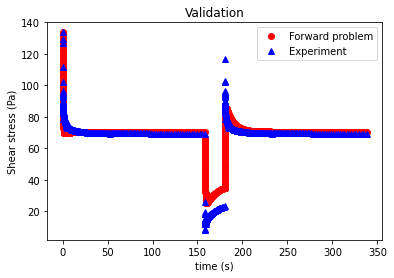

In [85]:
### Solving direct problem based on odeint ###

from scipy.integrate import odeint

valPoints1 = pd.read_excel('DOW5622_lowShearRates_101222.xlsx',header = None, names=['shear rate','t','shear stress'], sheet_name=5)
t_expt2 = np.array(valPoints1["t"])
t_expt2 = t_expt2[:,np.newaxis] # Converting to a column vector
#print(np.size(t_expt2))
gammadot2 = np.array(valPoints1["shear rate"])
gammadot2 = gammadot2[:,np.newaxis]
#print(np.size(gammadot2))
shear_stress2 = np.array(valPoints1["shear stress"])
shear_stress2 = shear_stress2[:,np.newaxis] # experiment value
#print(np.size(shear_stress2))

def dydt(y,t,G,eta_s,eta_p,k_plus,k_minus,yield_stress):
    
    shear_rate_ode = (1-np.heaviside(t-158.25,1))*1.0 + (np.heaviside(t-158.25,1)-np.heaviside(t-180.117,1))*0.1 \
    + (np.heaviside(t-180.117,1)-np.heaviside(t-338.292,1))*1.0
    
    y1, y2 = y
    dydt = [(G/(eta_s+eta_p))*(-y1 + yield_stress*y2 + (eta_s + eta_p*y2)*shear_rate_ode), k_plus*(1-y2) - k_minus*y2*shear_rate_ode]
    return dydt

t = t_expt2.reshape(np.size(t_expt2),) #Non-dimensional time
y0 = [133.79,0.5] 

# shear_rate_ode = 5
G_ode = 171.0 #202.0
eta_s_ode = 39.6 #39.5
eta_p_ode = 24.0 #42.0
k_plus_ode = 0.065 #0.044
k_minus_ode = 0.058 #0.063
yield_stress_ode = 34.8 #29.5


stress_ode = odeint(dydt,y0,t,args=(G_ode,eta_s_ode,eta_p_ode,k_plus_ode,k_minus_ode,yield_stress_ode))

#print(np.size(stress_ode))
#print(stress_ode)
plt.plot(t_expt2,stress_ode[:,0], 'or', label='Forward problem') 
plt.plot(t_expt2,shear_stress2, '^b', label='Experiment')
plt.legend()
#plt.xscale('log')
plt.title('Validation')
plt.xlabel('time (s)')
plt.ylabel('Shear stress (Pa)')
plt.show()

Compiling model...
'compile' took 0.507090 s

Training model...

1500091   [2.03e-06, 2.45e-06, 2.48e-04]    [2.54e-06, 2.18e-06, 2.48e-04]    []  
INFO:tensorflow:Optimization terminated with:
  Message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  Objective function value: 0.000252
  Number of iterations: 1
  Number of functions evaluations: 18
1500109   [2.03e-06, 2.45e-06, 2.48e-04]    [2.54e-06, 2.18e-06, 2.48e-04]    []  

Best model at step 1500091:
  train loss: 2.52e-04
  test loss: 2.52e-04
  test metric: []

'train' took 1.818854 s

Saving loss history to C:\Users\pnagrani\loss.dat ...
Saving training data to C:\Users\pnagrani\train.dat ...
Saving test data to C:\Users\pnagrani\test.dat ...


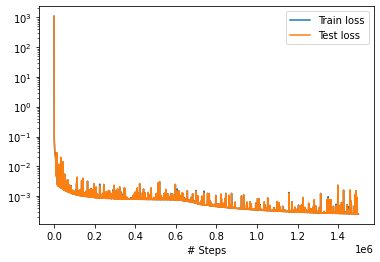

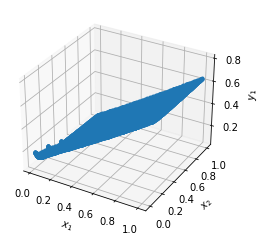

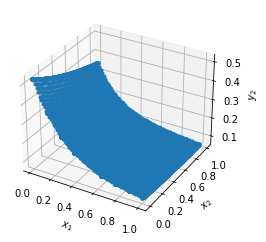

Compiling model...
'compile' took 0.630434 s

Training model...

Step      Train loss                        Test loss                         Test metric
1500109   [2.03e-06, 2.45e-06, 2.48e-05]    [2.54e-06, 2.18e-06, 2.48e-05]    []  

Best model at step 1500109:
  train loss: 2.93e-05
  test loss: 2.95e-05
  test metric: []

'train' took 0.628264 s



In [37]:
# dde.config.real.set_float64()

model.compile("L-BFGS-B",
              loss_weights=[1,1,1e1],
              external_trainable_variables=[G, eta_s, k_plus, k_minus])

model.train_step.optimizer_kwargs = {'options': {'maxfun': 1e5, 'ftol': 1e-20, 'gtol': 1e-20,'eps': 1e-20, 'iprint': -1, 'maxiter': 1e5}}

variable = dde.callbacks.VariableValue([G, eta_s, k_plus, k_minus], period=10, filename="variables1-4s_DOWTC5622_LBFGSB.dat")
losshistory, trainstate = model.train(callbacks = [variable])
dde.saveplot(losshistory, trainstate, issave=True, isplot=True)

variable = dde.callbacks.VariableValue([G, eta_s, k_plus, k_minus], period=1, filename="dummy-4s.txt")
model.compile("adam", lr=0, external_trainable_variables=[G, eta_s, k_plus, k_minus])
losshistory2, train_state2 = model.train(epochs=0, callbacks=[variable], display_every=1)